# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Importing the warnings module to manage warning messages in Python.
import warnings

# Suppressing warnings of category FutureWarning to prevent messages about
# features or libraries that may change in the future.
warnings.filterwarnings("ignore", category=FutureWarning)

# Suppressing warnings of category UserWarning to avoid non-critical user-level warnings.
warnings.filterwarnings("ignore", category=UserWarning)

### Understanding the structure of the data

In [ ]:
# Mount on my drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# To read the data
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Project 1/foodhub_order.csv')

In [ ]:
# To view the first 5 rows
print(data.head())

   order_id  customer_id            restaurant_name cuisine_type  \
0   1477147       337525                    Hangawi       Korean   
1   1477685       358141  Blue Ribbon Sushi Izakaya     Japanese   
2   1477070        66393                Cafe Habana      Mexican   
3   1477334       106968  Blue Ribbon Fried Chicken     American   
4   1478249        76942           Dirty Bird to Go     American   

   cost_of_the_order day_of_the_week     rating  food_preparation_time  \
0              30.75         Weekend  Not given                     25   
1              12.08         Weekend  Not given                     25   
2              12.23         Weekday          5                     23   
3              29.20         Weekend          3                     25   
4              11.59         Weekday          4                     25   

   delivery_time  
0             20  
1             23  
2             28  
3             15  
4             24  


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
data.shape

(1898, 9)

#### Observations:


There are **1898** rows and **9** columns.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


The dataset contains a mix of data types: **4 integer** columns (order_id, customer_id, food_preparation_time, delivery_time), **1 float** column (cost_of_the_order), and **4 object (string)** columns (restaurant_name, cuisine_type, day_of_the_week, rating)

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# checking missing values across each columns
data.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


In [ ]:
# Check for NaN values in all columns
nan_columns = data.isna().any()

# Display columns with NaN values
columns_with_nan = nan_columns[nan_columns].index
print("Columns with NaN values:", list(columns_with_nan))


Columns with NaN values: []


#### Observations:


The dataset contains no missing values across any columns. It includes both numerical and categorical data.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# The statistical summary for both the numerical and categorical variables.
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


In [ ]:
# To Find minimum, average and maximum time it takes for food to be prepared once an order is placed
min_time = data['food_preparation_time'].min()
average_time = round(data['food_preparation_time'].mean(), 2)
max_time = data['food_preparation_time'].max()

print(f"Minimum time: {min_time}")
print(f"Average time: {average_time}")
print(f"Maximum time: {max_time}")

Minimum time: 20
Average time: 27.37
Maximum time: 35


#### Observations:


The time it takes for food to be prepared after an order is placed varies as follows:

- **Minimum time**: 20 minutes
- **Average time**: 27.37 minutes
- **Maximum time**: 35 minutes

This suggests that the food preparation time generally falls within a 20 to 35 minute range, with an average of around 27 minutes. This information could help the company assess operational efficiency and potential areas for improvement in food preparation times.







### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
data[data['rating']=="Not given"].value_counts('rating')

,count
rating,
Not given,736


#### Observations:


Out of the total 1,836 orders, **736 orders do not have a rating**. This indicates that a significant portion of customers either did not provide feedback or possibly skipped the rating process, which could impact the company’s ability to assess customer satisfaction and improve service quality.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [ ]:
#Tthe number of unique values associated with each variable
data.nunique()

,0
order_id,1898
customer_id,1200
restaurant_name,178
cuisine_type,14
cost_of_the_order,312
day_of_the_week,2
rating,4
food_preparation_time,16
delivery_time,19


In [ ]:
#The total cost of all orders ordered on FoodHub within the period
data.cost_of_the_order.sum()

31314.82

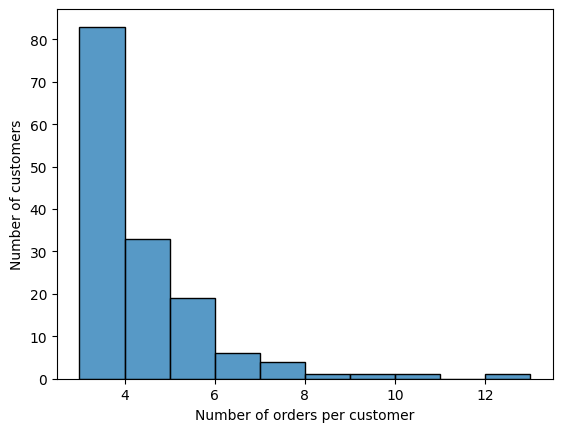

In [ ]:
#Histogram for those customers which order 3 or more times
ax=sns.histplot(data.customer_id.value_counts(), binwidth=1, binrange=(3,13))
ax.set(xlabel="Number of orders per customer")
ax.set(ylabel='Number of customers')
plt.show()

In [ ]:
#The number of customers which ordered two or fewer times in the period
(data.groupby('customer_id')['order_id'].count().sort_values(ascending=False)<=2).sum()

1051

In [ ]:
#Percent of all customers who ordered two or fewer times
round(1051/1200*100,1)

87.6

#### **1. Customer ID (Number of Orders per Customer)**

Total Unique Customers: 1200

Order Frequency per Customer:
customer_id
52832     13
47440     10
83287      9
250494     8
259341     7
Name: count, dtype: int64


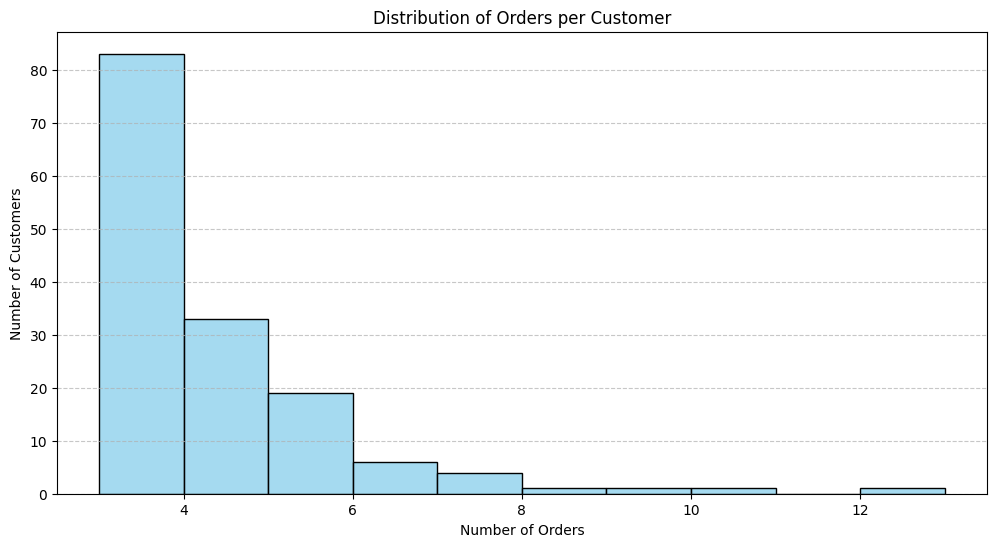

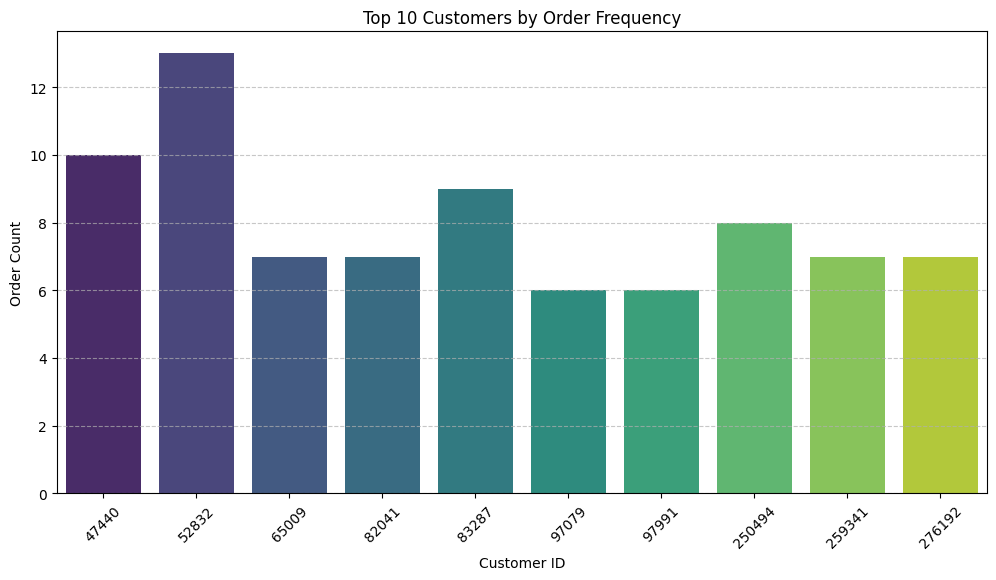

In [ ]:
# 1. Summary Statistics
unique_customers = data['customer_id'].nunique()
print(f"Total Unique Customers: {unique_customers}")

# Frequency of orders per customer
customer_order_frequency = data['customer_id'].value_counts()
print("\nOrder Frequency per Customer:")
print(customer_order_frequency.head())  # Display the top customers

# 2. Distribution of order frequencies
plt.figure(figsize=(12, 6))
sns.histplot(customer_order_frequency, binwidth=1, binrange=(3,13), kde=False, color='skyblue')
plt.title('Distribution of Orders per Customer')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 3. Top 10 Customers by Order Frequency
top_10_customers = customer_order_frequency.head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_customers.index, y=top_10_customers.values, palette='viridis')
plt.title('Top 10 Customers by Order Frequency')
plt.xlabel('Customer ID')
plt.ylabel('Order Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Chart Observation:**
- The histogram shows most customers made fewer orders (1-2 times).
- The distribution is right-skewed, with very few customers making frequent orders (up to 12).

**Data Analysis:**
- Total Unique Customers: 1200.
- 87.6% of customers ordered two or fewer times, indicating low customer retention or infrequent usage by most customers.
- Top customers placed between 5-7 orders.

**Insight:**
The platform needs to encourage repeat orders, perhaps through loyalty programs or personalized promotions.

#### **2. Restaurant Name (Number of Orders per Restaurant)**

Total Unique Restaurants: 178

Order Frequency per Restaurant:
restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


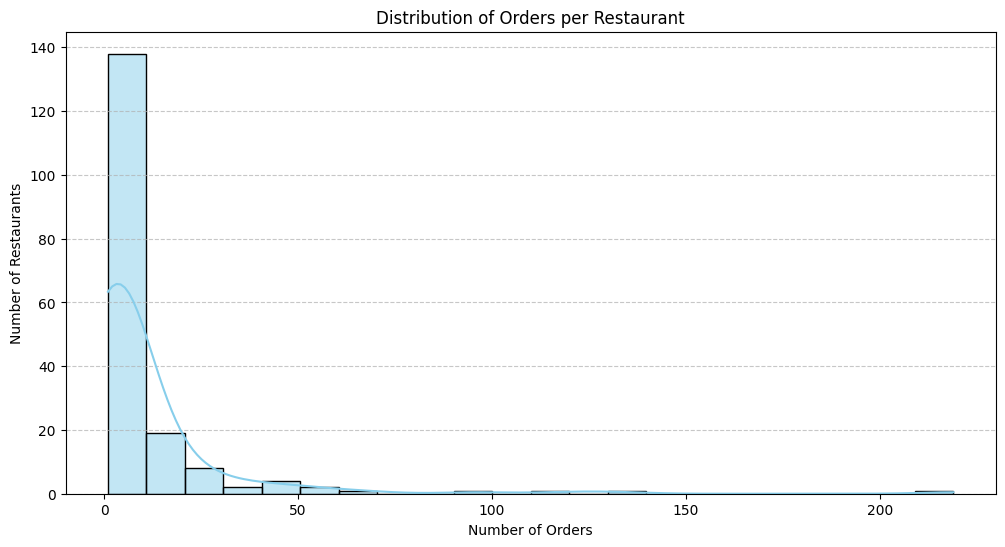

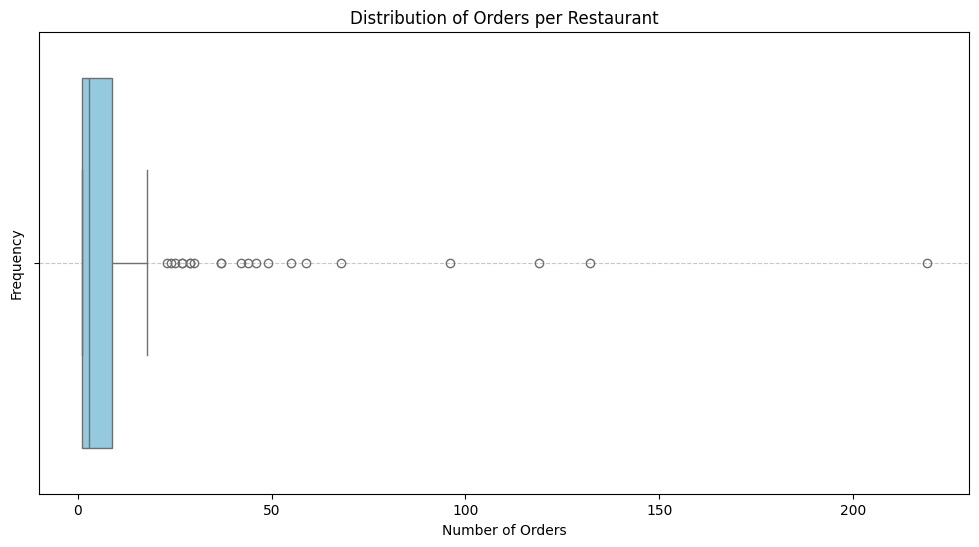

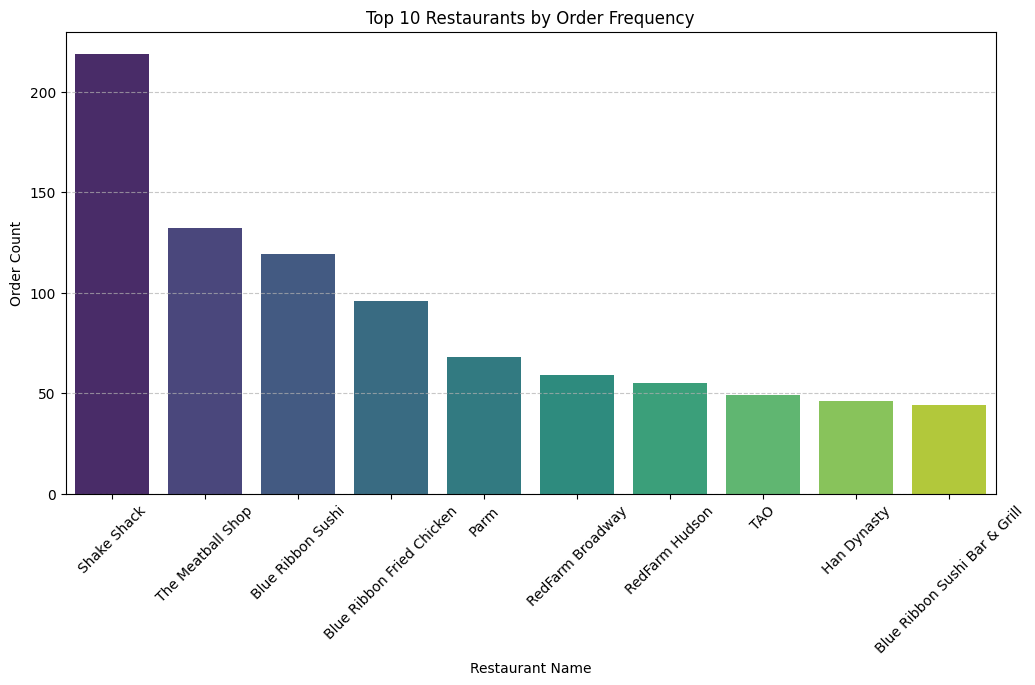

In [ ]:
# 1. Summary Statistics
unique_restaurants = data['restaurant_name'].nunique()
print(f"Total Unique Restaurants: {unique_restaurants}")

# Frequency of orders per restaurant
restaurant_order_frequency = data['restaurant_name'].value_counts()
print("\nOrder Frequency per Restaurant:")
print(restaurant_order_frequency.head())  # Display the top restaurants

# 2. Distribution of order frequencies
plt.figure(figsize=(12, 6))
sns.histplot(restaurant_order_frequency,binwidth=10, kde=True, color='skyblue')
plt.title('Distribution of Orders per Restaurant')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Restaurants')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Box plot for the distribution of order frequencies per restaurant
plt.figure(figsize=(12, 6))
sns.boxplot(x=restaurant_order_frequency, color='skyblue')
plt.title('Distribution of Orders per Restaurant')
plt.xlabel('Number of Orders')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# 3. Top 10 Restaurants by Order Frequency
top_10_restaurants = restaurant_order_frequency.head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_restaurants.index, y=top_10_restaurants.values, palette='viridis')
plt.title('Top 10 Restaurants by Order Frequency')
plt.xlabel('Restaurant Name')
plt.ylabel('Order Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Distribution of Orders per Restaurant**:
  - Most restaurants received fewer than **10 orders**, with a small number receiving **more than 20**.
  - Some outliers (restaurants receiving over 50 or 100 orders) indicate popular establishments driving a significant portion of the sales.

**Top 10 Restaurants by Order Frequency**:
  - A few restaurants dominate the order frequency, with the top restaurant receiving nearly **120 orders**.
  - Other leading restaurants show a gradual drop in frequency, suggesting a concentration of demand in a few popular eateries.


In [ ]:
# Calculate the frequency of orders per restaurant
restaurant_order_frequency = data['restaurant_name'].value_counts()

# Check if there are any restaurants with more than 150 orders
orders_greater_than_50 = restaurant_order_frequency[restaurant_order_frequency >50]

# Display the result
if orders_greater_than_50.empty:
    print("No restaurants have more than 50 orders.")
else:
    print("Restaurants with more than 50 orders:")
    print(orders_greater_than_50)


Restaurants with more than 50 orders:
restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
RedFarm Broadway              59
RedFarm Hudson                55
Name: count, dtype: int64


In [ ]:
# Calculate the frequency of orders per restaurant
restaurant_order_frequency = data['restaurant_name'].value_counts()

# Get the descriptive statistics
order_frequency_description = restaurant_order_frequency.describe()

# Display the description
print(order_frequency_description)


count    178.000000
mean      10.662921
std       24.047008
min        1.000000
25%        1.000000
50%        3.000000
75%        8.750000
max      219.000000
Name: count, dtype: float64


In [ ]:
# Describing the 'restaurant_name' column to get its summary statistics
data['restaurant_name'].describe()

,restaurant_name
count,1898
unique,178
top,Shake Shack
freq,219



**Chart Observation:**
- **Most restaurants have fewer orders**, but a few dominate the platform.
- A **boxplot reveals several outliers**, where restaurants have significantly higher orders, with Shake Shack topping the list.
- The **top 10 restaurants** collectively account for a substantial portion of total orders, and a few restaurants are outliers with high order counts.

**Data Analysis:**
- **Total Unique Restaurants:** 178.
- The **average number of orders per restaurant** is **10.66**, but the distribution has a **long tail** with a **maximum of 219 orders** for Shake Shack.
- **Only 5 restaurants have over 50 orders**, highlighting the dominance of a few high-performing restaurants.
- **Min:** 1 order.
- **25%:** 1 order.
- **50% (Median):** 3 orders.
- **75%:** 8.75 orders.
- **Max:** 219 orders.

**Insight:**
- Focus on **onboarding high-performing restaurants** or **promoting restaurants with high customer satisfaction**.
- **Long-tail restaurants** with fewer orders may need **visibility** or **offers** to boost their presence and increase customer orders.


#### **3. Cuisine Type**

Total Unique Cuisines: 14

Cuisine Frequency:
cuisine_type
American    584
Japanese    470
Italian     298
Chinese     215
Mexican      77
Name: count, dtype: int64


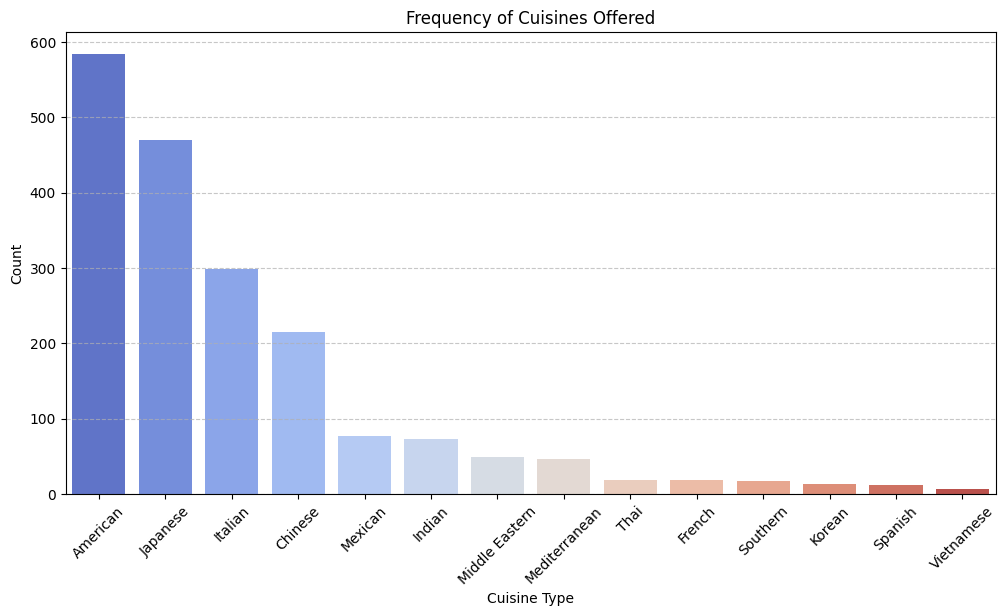

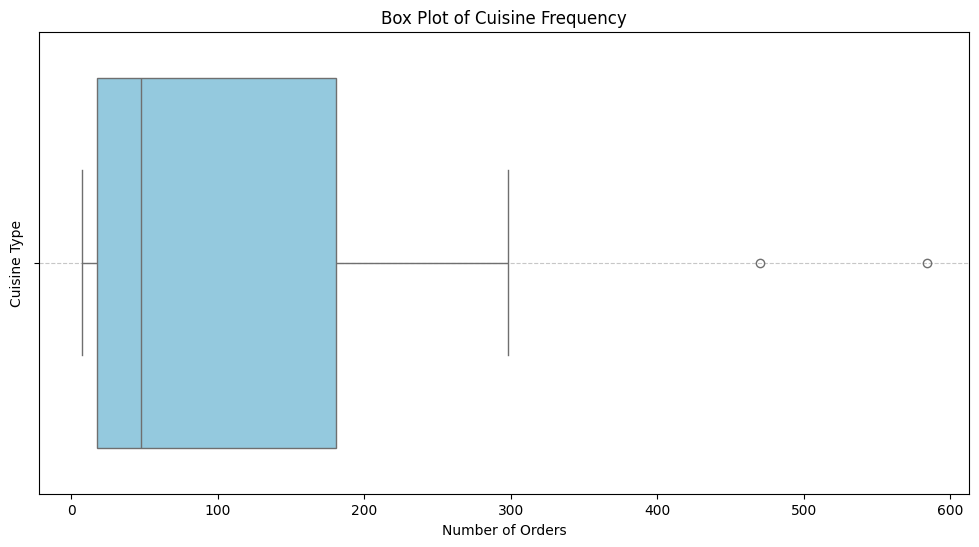

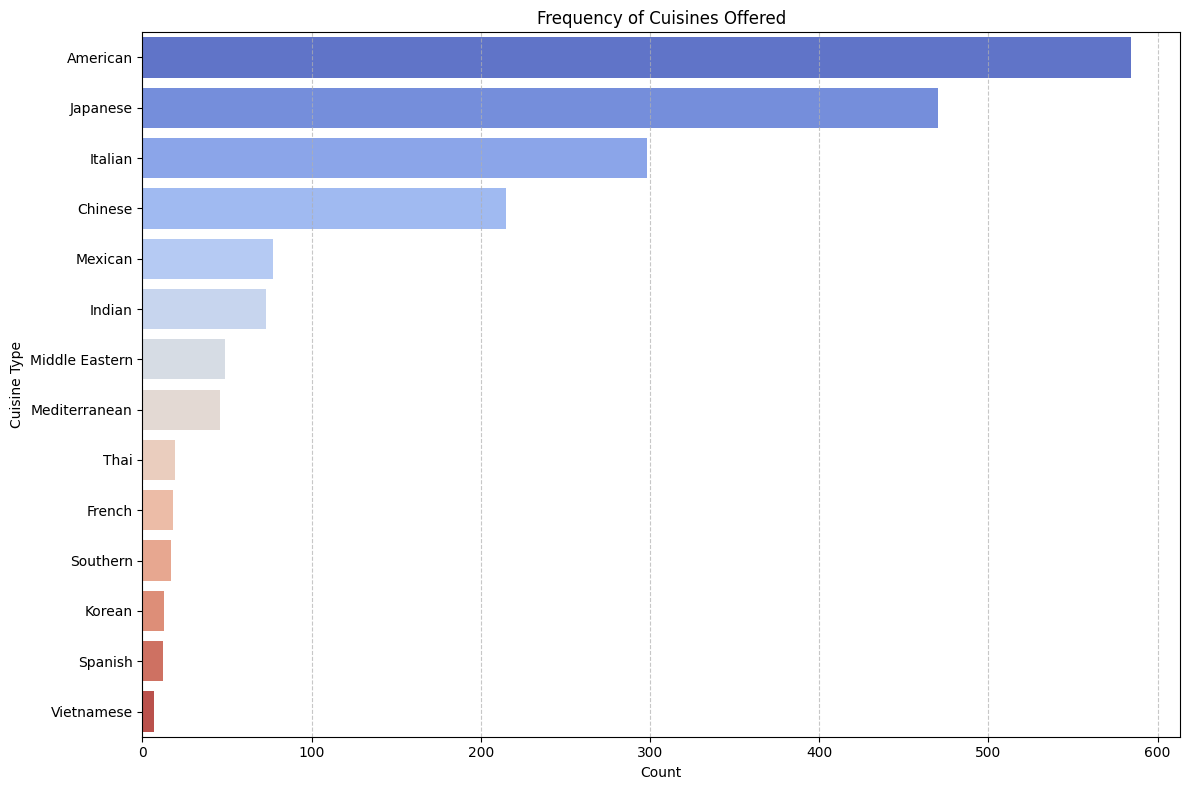

In [ ]:
# 1. Summary Statistics
unique_cuisines = data['cuisine_type'].nunique()
print(f"Total Unique Cuisines: {unique_cuisines}")

# Frequency of cuisines
cuisine_frequency = data['cuisine_type'].value_counts()
print("\nCuisine Frequency:")
print(cuisine_frequency.head())  # Display the top cuisines

# 2. Bar Plot of cuisine frequencies
plt.figure(figsize=(12, 6))
sns.barplot(x=cuisine_frequency.index, y=cuisine_frequency.values, palette='coolwarm')
plt.title('Frequency of Cuisines Offered')
plt.xlabel('Cuisine Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Create a box plot for the cuisine frequencies
plt.figure(figsize=(12, 6))
sns.boxplot(x=cuisine_frequency.values, color='skyblue')
plt.title('Box Plot of Cuisine Frequency')
plt.xlabel('Number of Orders')
plt.ylabel('Cuisine Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 3.Horizontal bar plot for cuisine frequencies
plt.figure(figsize=(12, 8))
sns.barplot(y=cuisine_frequency.index, x=cuisine_frequency.values, palette='coolwarm')
plt.title('Frequency of Cuisines Offered')
plt.xlabel('Count')
plt.ylabel('Cuisine Type')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()


In [ ]:
# Calculate the frequency of orders per cuisine type
cuisine_order_frequency = data['cuisine_type'].value_counts()

# Get the descriptive statistics
cuisine_order_frequency_description = cuisine_order_frequency.describe()

# Display the description
print(cuisine_order_frequency_description)


count     14.000000
mean     135.571429
std      187.448748
min        7.000000
25%       17.250000
50%       47.500000
75%      180.500000
max      584.000000
Name: count, dtype: float64


In [ ]:
# Describing the 'cuisine_type' column to get its summary statistics
data['cuisine_type'].describe()

,cuisine_type
count,1898
unique,14
top,American
freq,584


**Chart Observation:**
- American cuisine is the most frequently ordered, followed by Japanese and Italian.
- A bar chart shows significant variability in the frequency of different cuisines.

**Data Analysis:**
- Total Unique Cuisines: 14.
- American cuisine dominates with 584 orders, while some cuisines (e.g., Vietnamese) have minimal demand.

**Insight:**
The platform should prioritize popular cuisines (American, Japanese) while marketing less popular ones to expand customer choices.


#### **4. Cost of the Order**

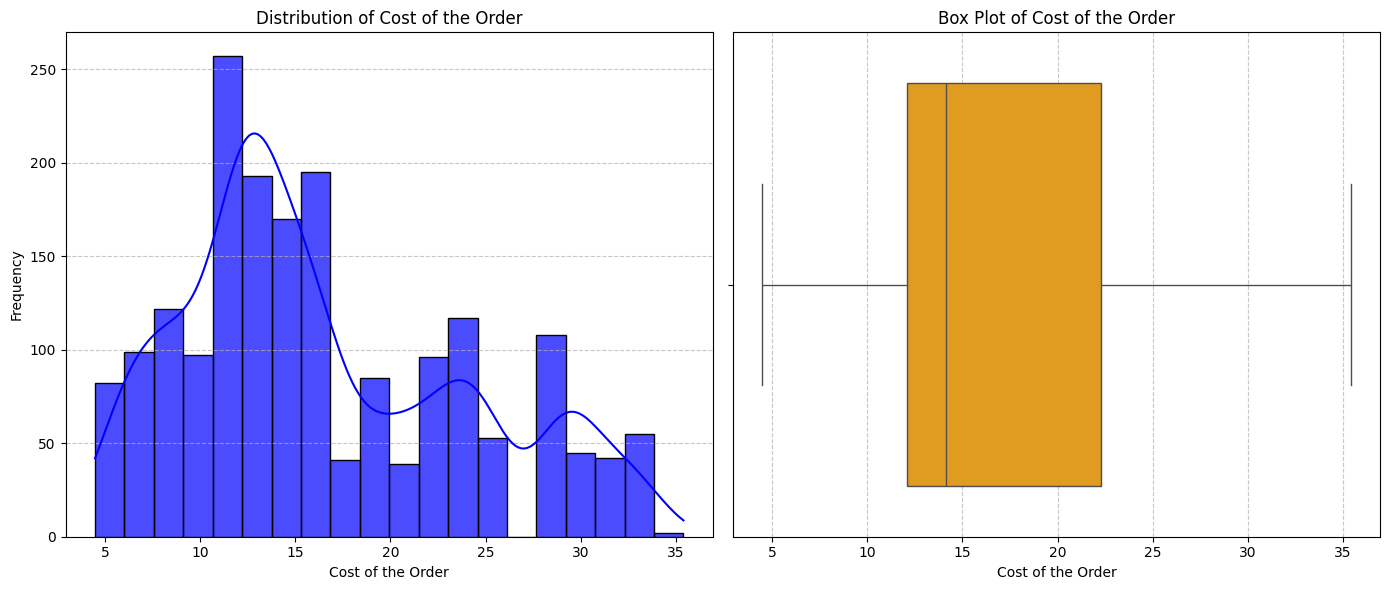

In [ ]:
# Set up the figure
plt.figure(figsize=(14, 6))

# Histogram for distribution
plt.subplot(1, 2, 1)
sns.histplot(data['cost_of_the_order'], kde=True, bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Cost of the Order')
plt.xlabel('Cost of the Order')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Box plot for spread and outliers
plt.subplot(1, 2, 2)
sns.boxplot(x=data['cost_of_the_order'], color='orange')
plt.title('Box Plot of Cost of the Order')
plt.xlabel('Cost of the Order')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
# Describing the 'cost_of_the_order' column to get its summary statistics
data['cost_of_the_order'].describe()

,cost_of_the_order
count,1898.000000
mean,16.498851
std,7.483812
min,4.470000
25%,12.080000
50%,14.140000
75%,22.297500
max,35.410000


In [ ]:
# Calculate the frequency of orders per cost_of_the_order
cost_of_the_order_frequency = data['cost_of_the_order'].value_counts()

# Get the descriptive statistics
cost_of_the_order_frequency_description = cost_of_the_order_frequency.describe()

# Display the description
print(cost_of_the_order_frequency_description)

count    312.000000
mean       6.083333
std        9.703951
min        1.000000
25%        1.000000
50%        3.000000
75%        7.000000
max       86.000000
Name: count, dtype: float64


**Chart Observation:**
- The histogram of order costs is right-skewed, with most orders in the $10-$25 range.
- A boxplot shows outliers, with some orders exceeding $30.

**Data Analysis:**
- Total Orders: 1,898.
- Average Order Cost: $16.50.

- The total cost of all orders: $31314.82.

**Insight:**
The majority of orders are mid-priced, suggesting a preference for affordability. Introduce promotions for high-value orders to balance the skew.

#### **5. Day of the Week (Weekday vs. Weekend Orders)**

['Weekend', 'Weekday']
Categories (2, object): ['Weekday', 'Weekend']


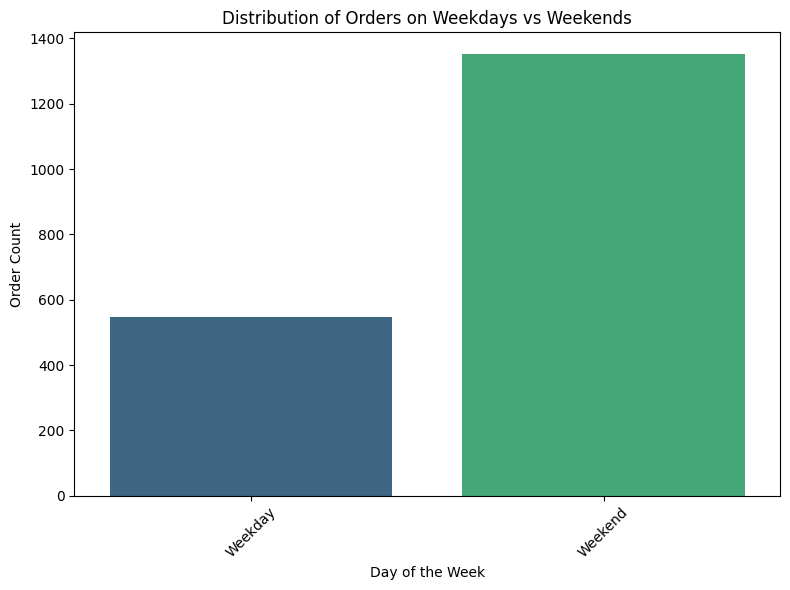

day_of_the_week
Weekend    71.18019
Weekday    28.81981
Name: proportion, dtype: float64


In [ ]:
# Convert 'day_of_week' to a categorical type if it's not already
data['day_of_the_week'] = data['day_of_the_week'].astype('category')

# Check the unique values of 'day_of_week' to verify
print(data['day_of_the_week'].unique())

# Count plot to show distribution of Weekdays vs Weekends
plt.figure(figsize=(8, 6))
sns.countplot(x='day_of_the_week', data=data, palette='viridis')
plt.title('Distribution of Orders on Weekdays vs Weekends')
plt.xlabel('Day of the Week')
plt.ylabel('Order Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate the percentage of orders on weekdays vs weekends
day_of_week_counts = data['day_of_the_week'].value_counts(normalize=True) * 100
print(day_of_week_counts)


In [ ]:
# Calculate the frequency of orders per cost_of_the_order
day_of_the_week_frequency = data['day_of_the_week'].value_counts()

# Get the descriptive statistics
day_of_the_week_frequency_description = day_of_the_week_frequency.describe()

# Display the description
print(day_of_the_week_frequency_description)

count       2.000000
mean      949.000000
std       568.513852
min       547.000000
25%       748.000000
50%       949.000000
75%      1150.000000
max      1351.000000
Name: count, dtype: float64


In [ ]:
# Describing the 'day_of_the_week' column to get its summary statistics
data['day_of_the_week'].describe()

,day_of_the_week
count,1898
unique,2
top,Weekend
freq,1351


**Chart Observation:**
- Orders on weekends significantly outnumber weekdays.

**Data Analysis:**
- Weekend: 71.18% of orders.
- Weekday: 28.82% of orders.

**Insight:**
Weekend traffic is much higher. Introduce weekday-specific discounts or offers to balance traffic and utilization during off-peak days.

#### **6. Rating**

Summary Statistics for Ratings:
count          1898
unique            4
top       Not given
freq            736
Name: rating, dtype: object

Frequency Count of Ratings:
rating
3            188
4            386
5            588
Not given    736
Name: count, dtype: int64


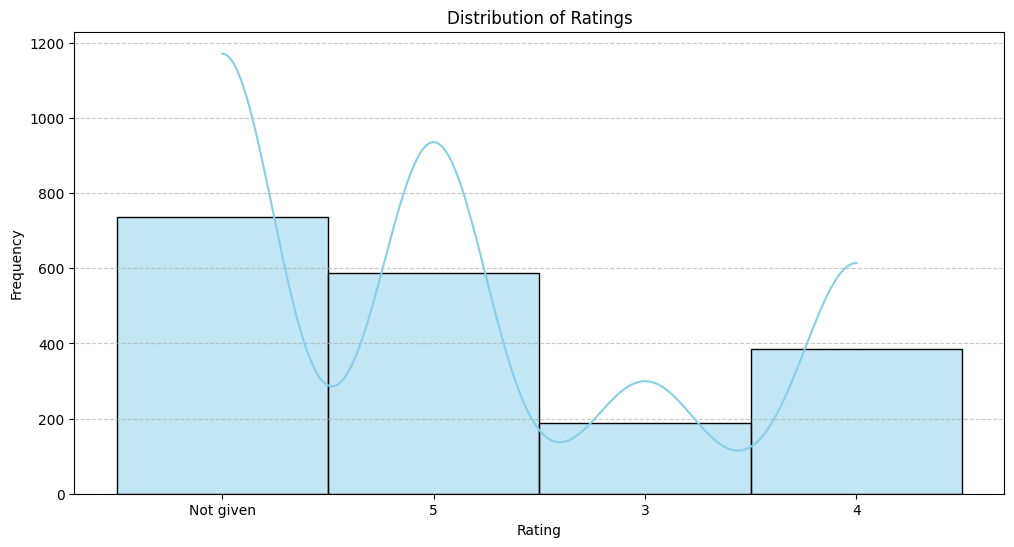

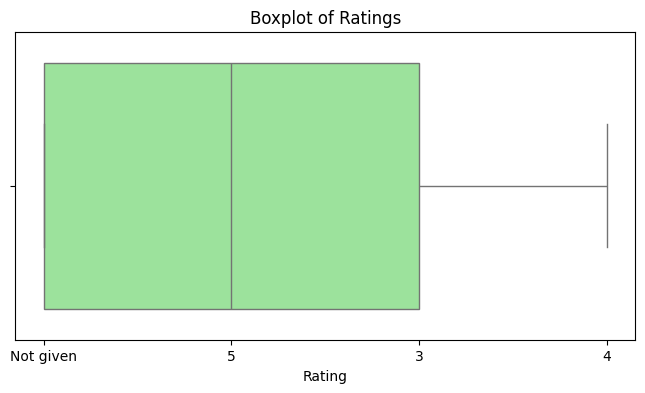

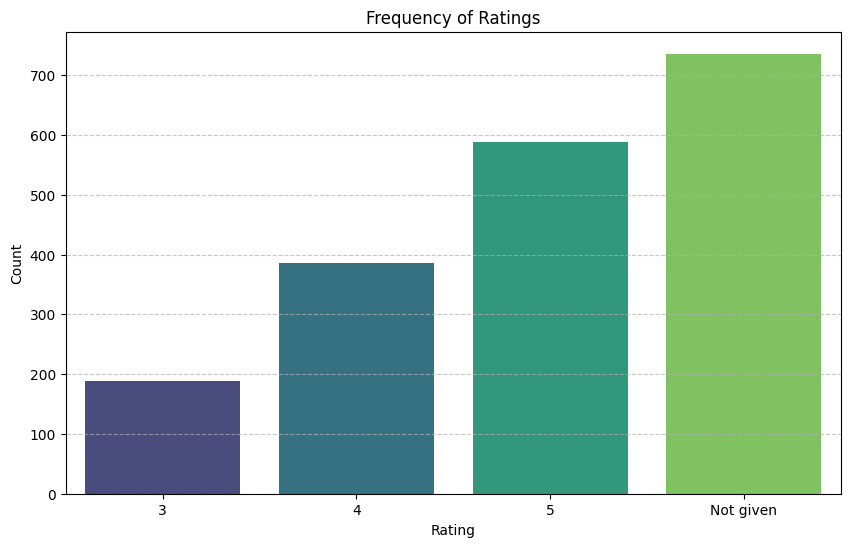

In [ ]:
# 1. Summary Statistics
rating_summary = data['rating'].describe()
print("Summary Statistics for Ratings:")
print(rating_summary)

# 2. Frequency Count
rating_frequency = data['rating'].value_counts().sort_index()
print("\nFrequency Count of Ratings:")
print(rating_frequency)

# 3. Distribution Plot
plt.figure(figsize=(12, 6))
sns.histplot(data['rating'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 4. Boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(x=data['rating'], color='lightgreen')
plt.title('Boxplot of Ratings')
plt.xlabel('Rating')
plt.show()

# Optional: Barplot for Frequency Count
plt.figure(figsize=(10, 6))
sns.barplot(x=rating_frequency.index, y=rating_frequency.values, palette='viridis')
plt.title('Frequency of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
# Calculate the frequency of orders per cost_of_the_order
rating_frequency = data['rating'].value_counts()

# Get the descriptive statistics
rating_frequency_description = rating_frequency.describe()

# Display the description
print(rating_frequency_description)

count      4.000000
mean     474.500000
std      238.871653
min      188.000000
25%      336.500000
50%      487.000000
75%      625.000000
max      736.000000
Name: count, dtype: float64



**Chart Observation:**
- The most common rating is "Not given," accounting for 736 instances.
- Among numerical ratings, 5 is the most frequent, followed by 4 and 3.

**Data Analysis:**
- The average count per rating category is 474.5, with a standard deviation of 238.87.
- Numerical ratings are skewed towards higher values, indicating positive customer sentiment.

**Insight:**
- While customer satisfaction is generally high, with most ratings being 4 or 5, the significant number of "Not given" ratings suggests an opportunity to encourage more detailed feedback. Addressing the concerns of customers who rate 3 or below can further enhance satisfaction.

#### **7. Food Preparation Time**

Summary Statistics for Food Preparation Time:
count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64

Frequency Count of Food Preparation Time:
food_preparation_time
20    119
21    135
22    123
23    123
24    121
25    113
26    115
27    123
28    121
29    109
30    119
31    116
32    113
33    118
34    113
35    117
Name: count, dtype: int64


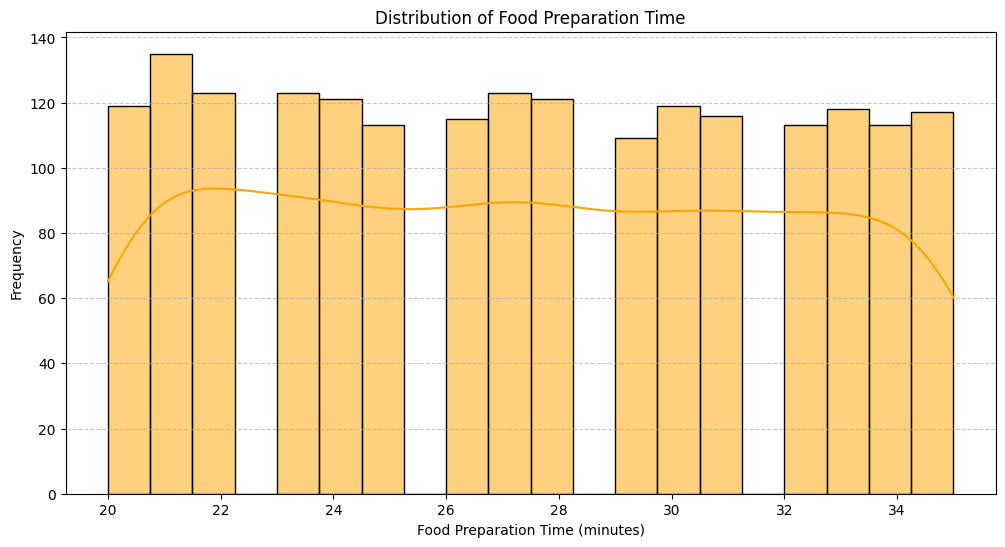

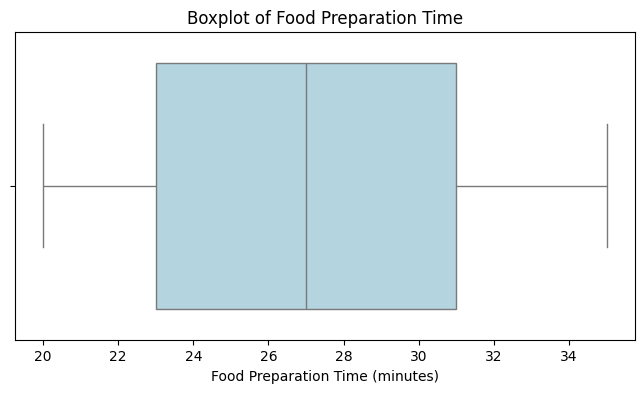

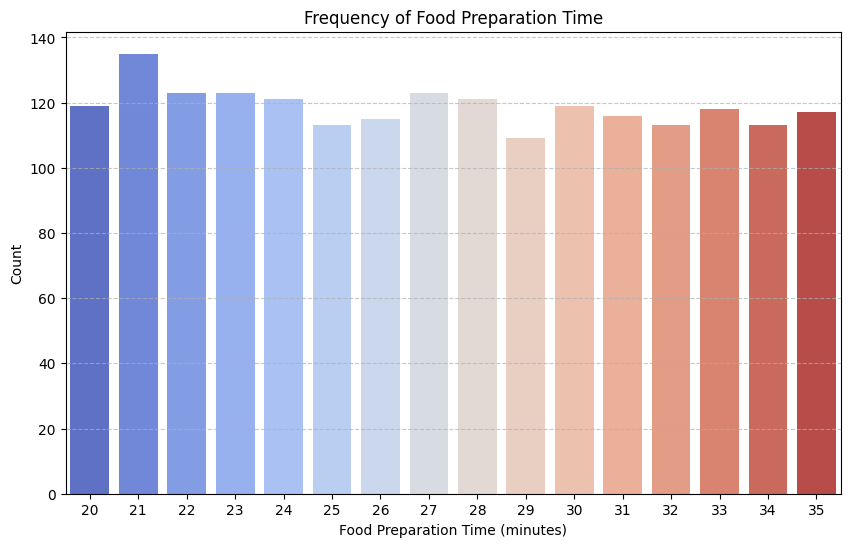

In [ ]:

# 1. Summary Statistics
prep_time_summary = data['food_preparation_time'].describe()
print("Summary Statistics for Food Preparation Time:")
print(prep_time_summary)

# 2. Frequency Count
prep_time_frequency = data['food_preparation_time'].value_counts().sort_index()
print("\nFrequency Count of Food Preparation Time:")
print(prep_time_frequency)

# 3. Distribution Plot
plt.figure(figsize=(12, 6))
sns.histplot(data['food_preparation_time'], bins=20, kde=True, color='orange')
plt.title('Distribution of Food Preparation Time')
plt.xlabel('Food Preparation Time (minutes)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 4. Boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(x=data['food_preparation_time'], color='lightblue')
plt.title('Boxplot of Food Preparation Time')
plt.xlabel('Food Preparation Time (minutes)')
plt.show()

#5. Barplot for Frequency Count
plt.figure(figsize=(10, 6))
sns.barplot(x=prep_time_frequency.index, y=prep_time_frequency.values, palette='coolwarm')
plt.title('Frequency of Food Preparation Time')
plt.xlabel('Food Preparation Time (minutes)')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



**Chart Observation:**
- Preparation times are relatively uniform, ranging mostly between 20-35 minutes.
- A histogram shows small peaks across the range, with no significant spikes.

**Data Analysis:**
- Average Preparation Time: 27.4 minutes.
- Most common preparation times: 20-25 minutes.

**Insight:**
Preparation times are consistent, but optimizing this further (reducing to under 25 minutes) can improve customer satisfaction.

#### **8. Delivery Time**

Summary Statistics for Delivery Time:
count    1898.000000
mean       24.161749
std         4.972637
min        15.000000
25%        20.000000
50%        25.000000
75%        28.000000
max        33.000000
Name: delivery_time, dtype: float64

Frequency Count of Delivery Time:
delivery_time
15     87
16     90
17     78
18     83
19     90
20     88
21     81
22     85
23     77
24    162
25    120
26    141
27    138
28    148
29    148
30    133
31     41
32     59
33     49
Name: count, dtype: int64


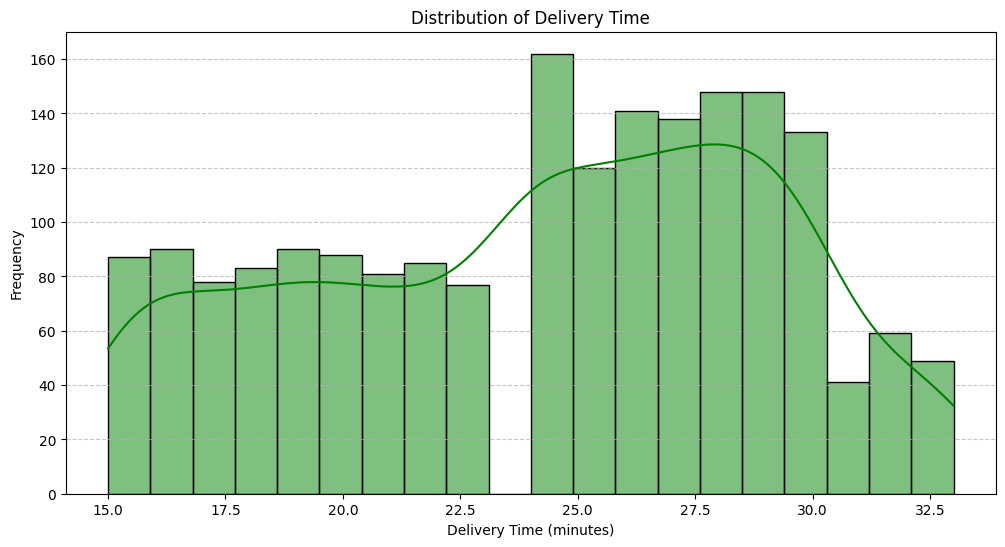

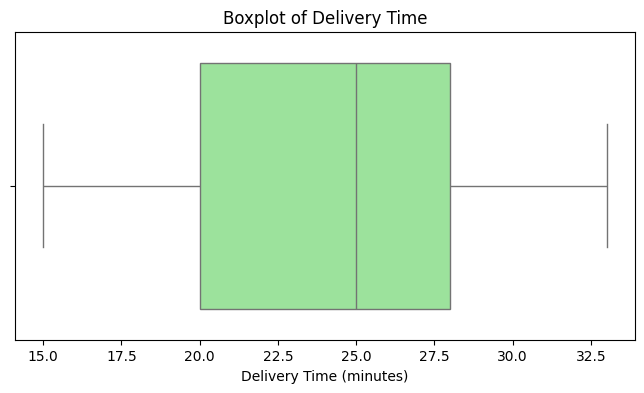

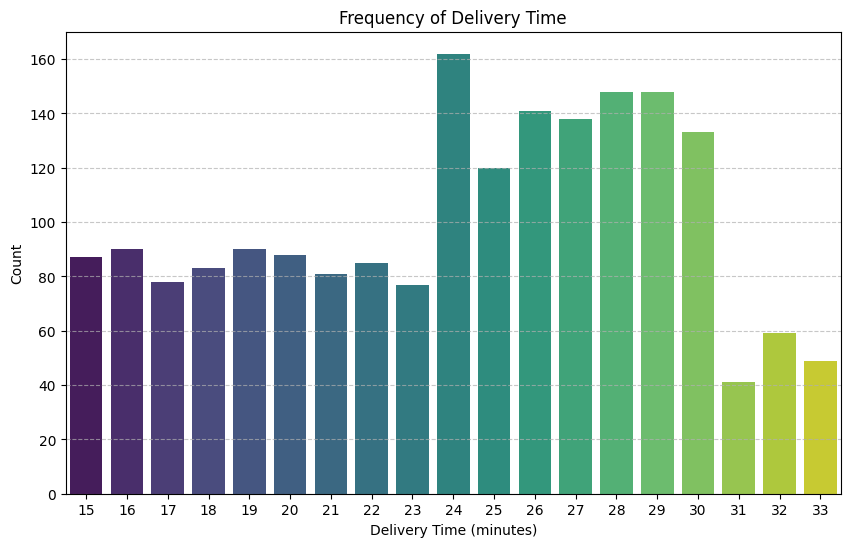

In [ ]:

# 1. Summary Statistics
delivery_time_summary = data['delivery_time'].describe()
print("Summary Statistics for Delivery Time:")
print(delivery_time_summary)

# 2. Frequency Count
delivery_time_frequency = data['delivery_time'].value_counts().sort_index()
print("\nFrequency Count of Delivery Time:")
print(delivery_time_frequency)

# 3. Distribution Plot
plt.figure(figsize=(12, 6))
sns.histplot(data['delivery_time'], bins=20, kde=True, color='green')
plt.title('Distribution of Delivery Time')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 4. Boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(x=data['delivery_time'], color='lightgreen')
plt.title('Boxplot of Delivery Time')
plt.xlabel('Delivery Time (minutes)')
plt.show()

# Barplot for Frequency Count
plt.figure(figsize=(10, 6))
sns.barplot(x=delivery_time_frequency.index, y=delivery_time_frequency.values, palette='viridis')
plt.title('Frequency of Delivery Time')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



**Chart Observation:**
- Delivery times are clustered between 15-33 minutes, with a peak around 25-30 minutes.

**Data Analysis:**
- Average Delivery Time: 24.15 minutes.
- Orders with delivery times exceeding 30 minutes could lead to dissatisfaction.

**Insight:**
Maintaining consistent and quick delivery times (under 25 minutes) should be a priority to enhance user experience.


#### **Univariate Analysis Recommendations**:
1. **Increase Customer Retention:**
   - With 87.6% of customers ordering two or fewer times, strategies like loyalty programs, discounts for repeat orders, and personalized recommendations are needed.
   
2. **Boost Underperforming Restaurants:**
   - Provide incentives or visibility to restaurants with low order volumes.

3. **Expand Popular Cuisines:**
   - Ensure adequate supply and variety in top cuisines (e.g., American, Japanese).

4. **Promote Weekday Sales:**
   - Balance the order distribution by introducing weekday discounts or promotions.

5. **Optimize Preparation and Delivery Times:**
   - Focus on ensuring orders are prepared and delivered in under 25 minutes to retain high ratings and customer satisfaction.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
#Top 5 restaurants in terms of the number of orders
top_5_restaurants = data.restaurant_name.value_counts().head(5)
print("Top 5 Restaurants and their Order Counts:")
print(top_5_restaurants)

Top 5 Restaurants and their Order Counts:
restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


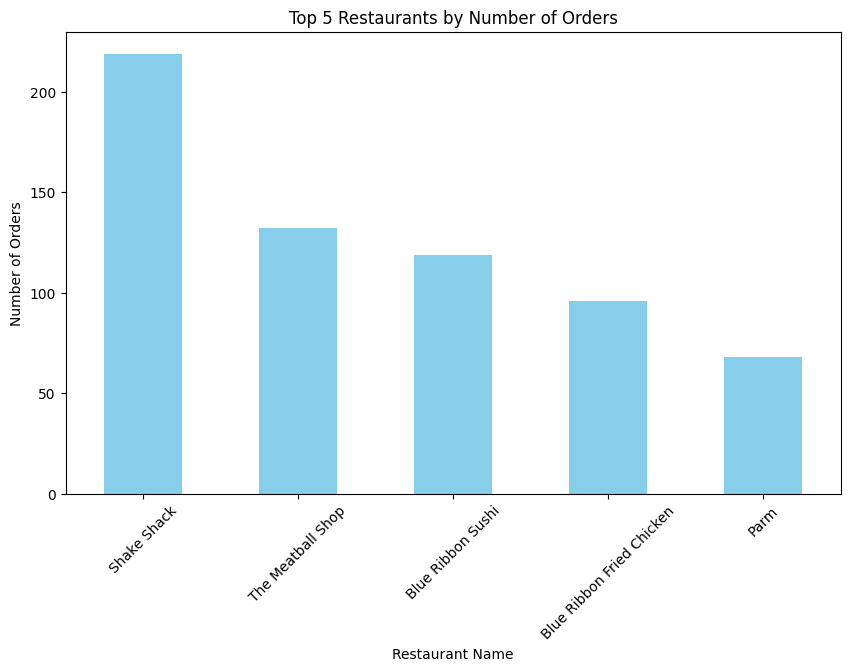

In [ ]:
# Plot the bar chart
plt.figure(figsize=(10, 6))
top_5_restaurants.plot(kind='bar', color='skyblue')

# Adding labels and title
plt.xlabel('Restaurant Name')
plt.ylabel('Number of Orders')
plt.title('Top 5 Restaurants by Number of Orders')

# Show the plot
plt.xticks(rotation=45)
plt.show()


#### Observations:


- **Shake Shack** is the most popular restaurant with **219 orders**, showcasing its high demand.  
- **The Meatball Shop** ranks second with **132 orders**, reflecting its strong customer base.  
- **Blue Ribbon Sushi** and **Blue Ribbon Fried Chicken** follow with **119** and **96 orders**, highlighting consistent demand for their offerings.  
- **Parm**, with **68 orders**, secures the fifth spot, indicating a smaller but dedicated clientele.  

These insights help identify key restaurants driving customer traffic and provide opportunities for targeted promotional campaigns.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# Most popular cuisine on weekends
weekend_cuisine_counts = data[data['day_of_the_week'] == "Weekend"]['cuisine_type'].value_counts()
print("Weekend Cuisine count:")
print(weekend_cuisine_counts)
most_popular_cuisine = data[data['day_of_the_week'] == "Weekend"]['cuisine_type'].value_counts().idxmax()
print("\nThe most popular cuisine on weekends is:", most_popular_cuisine)

Weekend Cuisine count:
cuisine_type
American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: count, dtype: int64

The most popular cuisine on weekends is: American


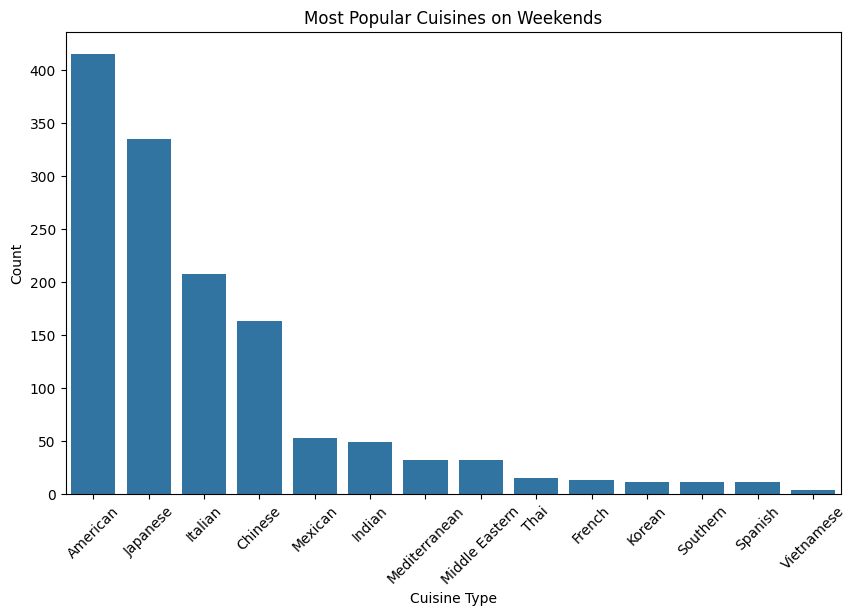

In [ ]:
# Filter data for weekends and count the occurrences of each cuisine type
weekend_cuisine_counts = data[data['day_of_the_week'] == "Weekend"]['cuisine_type'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=weekend_cuisine_counts.index, y=weekend_cuisine_counts.values)

# Adding labels and title
plt.xlabel('Cuisine Type')
plt.ylabel('Count')
plt.title('Most Popular Cuisines on Weekends')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability

# Show the plot
plt.show()


#### Observations:
The data indicates that **American cuisine** is the most popular choice on weekends, with a total of **415 orders**, significantly surpassing other cuisines such as Japanese (**335 orders**) and Italian (**207 orders**). This suggests a strong preference for familiar and widely accessible options during the weekend, possibly influenced by factors such as family gatherings, casual dining trends, or the availability of American restaurants. Understanding this trend can help restaurants optimize their menu offerings and promotions to cater to weekend demand.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Filter orders where the cost is greater than 20 dollars
orders_above_20 = data[data['cost_of_the_order'] > 20]

# Get the total number of orders in the dataset
total_orders = data.shape[0]

# Get the number of orders where the cost is greater than 20 dollars
orders_above_20_count = orders_above_20.shape[0]

# Calculate the percentage of orders costing more than 20 dollars
percentage_orders_above_20 = (orders_above_20_count / total_orders) * 100

# Print the result with formatted percentage
print(f"The percentage of orders that cost more than 20 dollars is {percentage_orders_above_20:.2f}%")


The percentage of orders that cost more than 20 dollars is 29.24%


#### Observations:


Based on the data from the FoodHub platform, **29.24%** of the total orders placed cost more than 20 dollars. This suggests that a considerable portion of the customers are opting for higher-value orders, which could play a crucial role in the company's revenue generation and targeted promotions for enhancing customer engagement.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# To find mean
mean_delivery_time = data['delivery_time'].mean()
print("The mean order delivery time is:", mean_delivery_time, "minutes")

The mean order delivery time is: 24.161749209694417 minutes


In [ ]:
# Round the value
mean_delivery_time = round(data['delivery_time'].mean())
print("The mean order delivery time is:", mean_delivery_time, "minutes")

The mean order delivery time is: 24 minutes


#### Observations:


The average time it takes for an order to be delivered, from the moment it is picked up by the delivery person to its drop-off at the customer's location, is **24 minutes**. This represents the typical delivery time for the company's orders.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
print("The top 3 most frequent customers are:")
print(data['customer_id'].value_counts().head(3))

The top 3 most frequent customers are:
customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64


#### Observations:


The top 3 most frequent customers, who are eligible for the 20% discount vouchers, are:

*   Customer ID: **52832** with **13** orders
*   Customer ID: **47440** with **10** orders
*   Customer ID: **83287** with **9** orders

These customers have demonstrated high engagement with the platform by placing the most orders, and are now eligible for promotional rewards.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


 **1. Frequency of Orders by Day of the Week (Bar Chart)**

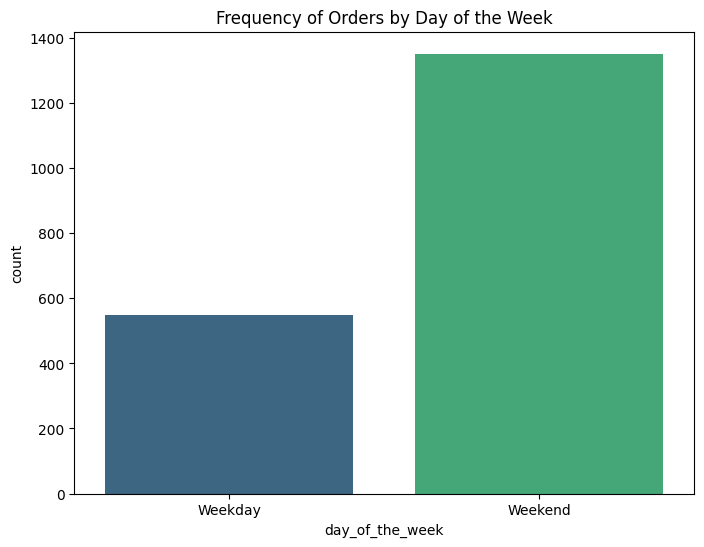

In [ ]:
# 1. Bar Chart: Frequency of orders by day_of_the_week
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='day_of_the_week', palette='viridis')
plt.title("Frequency of Orders by Day of the Week")
plt.show()

#### Observations:


  - **Weekend Dominance**: The number of orders on weekends is more than double that of weekdays.
  - **Weekday Trend**: Lower order volumes on weekdays might indicate that people dine out less or opt for home-cooked meals during the workweek.
  - **Weekend Preference**: The large increase in weekend orders suggests that customers prefer dining out, ordering food, or socializing over weekends.

**Conclusion**:
  - Weekends are the primary revenue drivers, with significantly higher customer activity.
  - Businesses should allocate more resources (staff, delivery drivers, kitchen capacity) on weekends to meet the demand effectively.
  - Weekday sales could be boosted through promotional offers, meal discounts, or subscription plans targeted at working individuals.

 **2. Cost of Order vs. Food Preparation Time (Scatter Plot)**

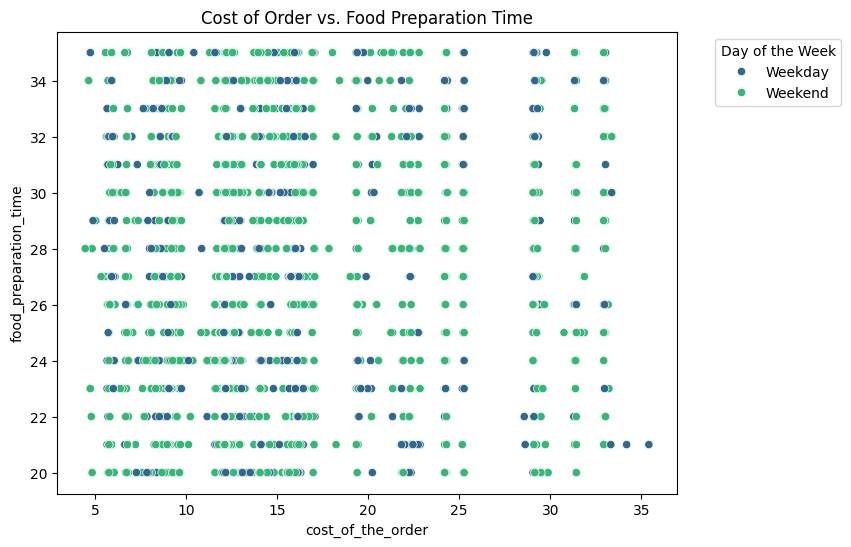

In [ ]:
# 2. Scatterplot: Cost of Order vs. Food Preparation Time
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='cost_of_the_order', y='food_preparation_time', hue='day_of_the_week', palette='viridis')
plt.title("Cost of Order vs. Food Preparation Time")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Day of the Week")
plt.show()


#### Observations:

  - **Minimal Relationship**: The points are scattered without a clear trend, indicating no strong correlation between *cost_of_the_order* and *food_preparation_time*.
  - **Distribution by Day**:
    - Both weekdays and weekends show similar distributions, meaning food preparation times are relatively consistent regardless of the day.
    - Orders with higher costs (>25) are scattered evenly across weekdays and weekends, suggesting pricing tiers that do not affect preparation time.
  - **Clusters**:
    - There is a noticeable clustering of orders with costs between 10-25 and preparation times around 24-30 minutes, indicating operational efficiency in standard-priced orders.
  
**Conclusion**:
  - Food preparation time is not influenced by the cost of the order, showing efficient kitchen processes.
  - Businesses can maintain consistent preparation times while catering to both low-cost and high-cost orders.
  - Further investigation might reveal whether customer satisfaction is tied to preparation times, which could provide insights for targeted process optimizations.

**3. Pair Plot - A scatterplot matrix showing relationships between numerical variables**

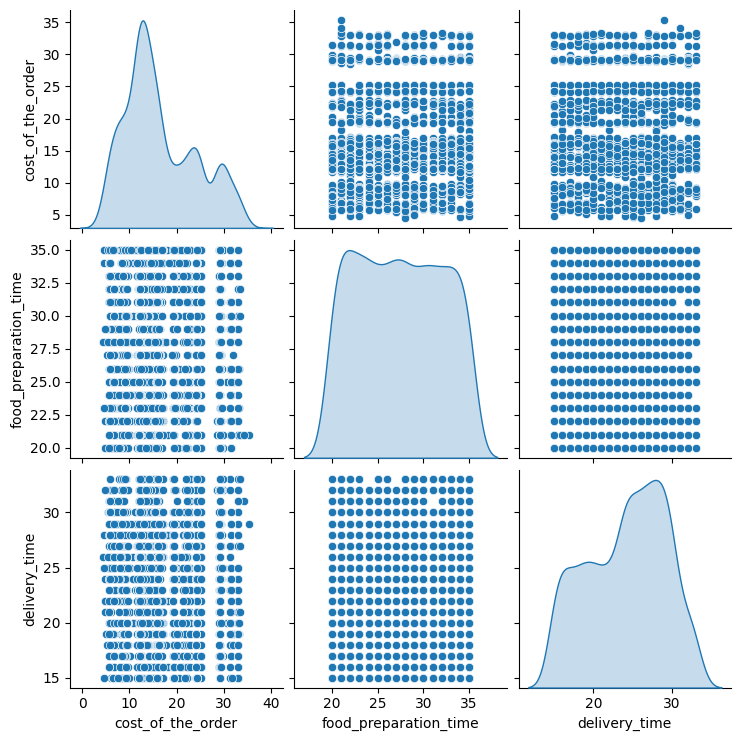

In [ ]:
# 3. Pairplot: Numerical Variables
sns.pairplot(data[['cost_of_the_order', 'food_preparation_time', 'delivery_time', 'rating']], diag_kind='kde', palette='viridis')
plt.show()

#### Observations:

**Diagonal Histograms:**

*  Cost_of_the_order has distinct peaks, indicating it may be influenced by fixed pricing structures (e.g., menu tiers).
*   Food_preparation_time and delivery_time are relatively uniform, suggesting standardization in operational processes.
*   Ratings are clustered around 4 and 5, indicating generally high customer satisfaction.

**Scatterplots:**
No strong relationships are visible between variables. For instance, higher delivery_time does not significantly impact rating.

**Conclusion:** The independence of variables suggests operational stability. While delivery and preparation times are consistent, maintaining competitive pricing and ensuring high ratings should remain priorities. No major trade-offs are observed between cost_of_the_order, delivery_time, and rating.

**4. Cost of the Order by Cuisine Type (Boxplot)**

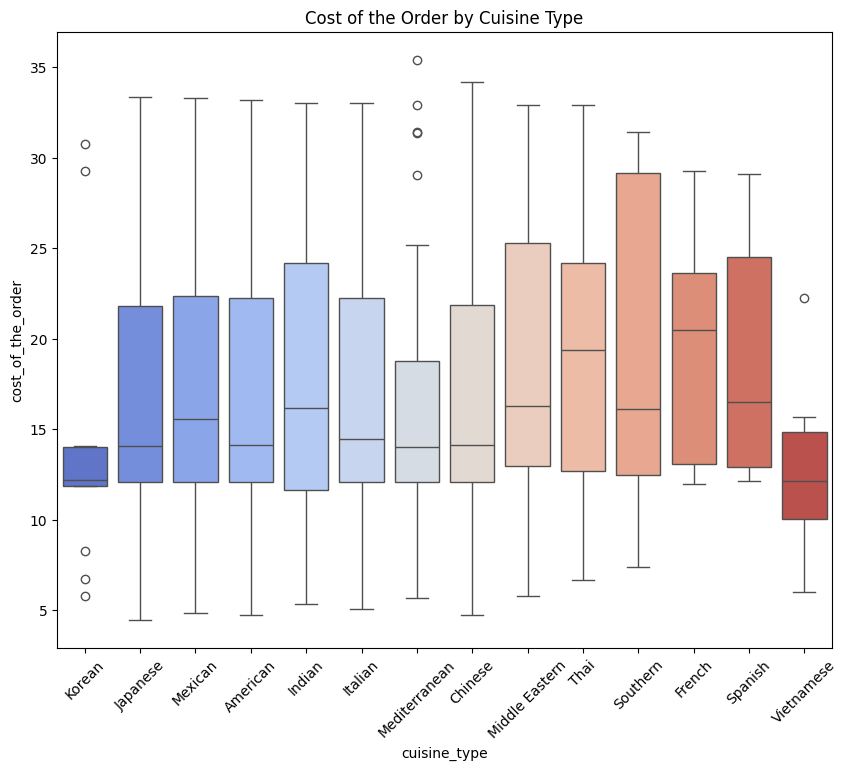

In [ ]:
# 4. Boxplot: Cost of the Order by Cuisine Type
plt.figure(figsize=(10, 8))
sns.boxplot(data=data, x='cuisine_type', y='cost_of_the_order', palette='coolwarm')
plt.xticks(rotation=45)
plt.title("Cost of the Order by Cuisine Type")
plt.show()

#### Observations:

- Premium cuisines (*French*, *Japanese*) have the highest median costs, indicating their perception as high-value offerings.
     - Consistent pricing is observed in *Fast Food* and *Mexican* cuisines, indicating these are more affordable and standardized.
     - Outliers in *French* and *Mediterranean* could represent high-value, specialized dishes or premium orders.

**Conclusion**: Pricing strategies should be tailored by cuisine. Premium cuisines can target higher-income customers, while affordable options like *Mexican* and *Fast* Food` attract cost-conscious consumers. Highlighting affordable cuisines can help broaden customer reach, while premium cuisines can be marketed as luxury experiences.

**5. Delivery Time by Day of the Week (Boxplot)**

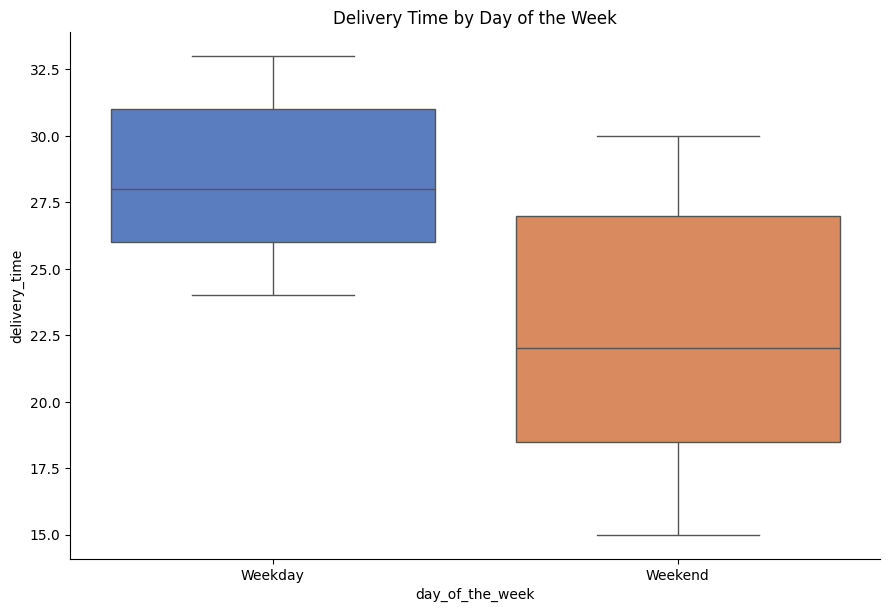

In [ ]:
# 5. Catplot: Delivery Time by Day of the Week
sns.catplot(data=data, x='day_of_the_week', y='delivery_time', kind='box', height=6, aspect=1.5, palette='muted',legend=False)
plt.title("Delivery Time by Day of the Week")
plt.show()

#### Observations:

- Weekday deliveries are quicker and more consistent (narrower interquartile range), suggesting streamlined processes during lower demand.
- Weekend deliveries are slightly slower with greater variability, likely due to higher demand and potential operational strain.
- Few outliers show occasional delays on both weekdays and weekends, indicating generally reliable delivery times.

**Conclusion**: Delivery operations are efficient on weekdays, and there is room for improvement on weekends to handle higher demand. Businesses could optimize staffing or logistics during weekends to reduce variability and ensure faster deliveries, further improving customer satisfaction.


**6. Correlation Matrix** - A heatmap showing correlations between numerical variables.

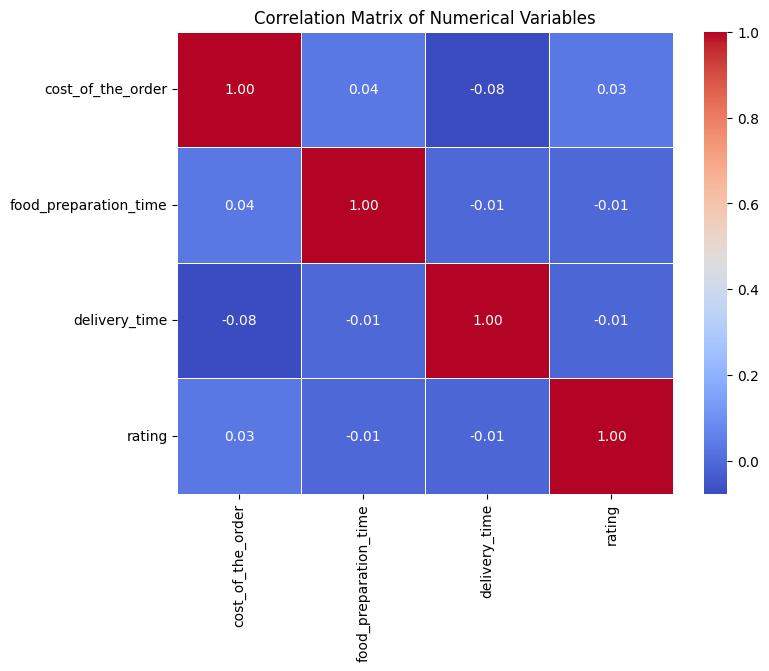

In [ ]:
# 6. Heatmap: Correlation Matrix of Numerical Variables
# Handle non-numeric and missing values
data['cost_of_the_order'] = pd.to_numeric(data['cost_of_the_order'], errors='coerce')
data['food_preparation_time'] = pd.to_numeric(data['food_preparation_time'], errors='coerce')
data['delivery_time'] = pd.to_numeric(data['delivery_time'], errors='coerce')
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')

# Drop rows with missing values (or handle them as required)
data = data.dropna(subset=['cost_of_the_order', 'food_preparation_time', 'delivery_time', 'rating'])

# Calculate the correlation matrix
corr_matrix = data[['cost_of_the_order', 'food_preparation_time', 'delivery_time', 'rating']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix of Numerical Variables")
plt.show()


#### Observations:


- All correlations are weak:
  - *Cost_of_the_order* and *rating* show a slight positive correlation, suggesting costlier orders might lead to slightly better reviews.
  - Minimal correlation between *delivery_time* and other variables indicates that it operates independently.

**Conclusion**: The lack of strong correlations is a positive sign of operational independence. External factors like service quality, menu variety, and efficient operations might drive ratings rather than just cost or delivery time. Companies can focus on improving service elements without being overly constrained by cost or timing.


**7. Rating Distribution by Day of the Week (Stacked Bar Chart)**

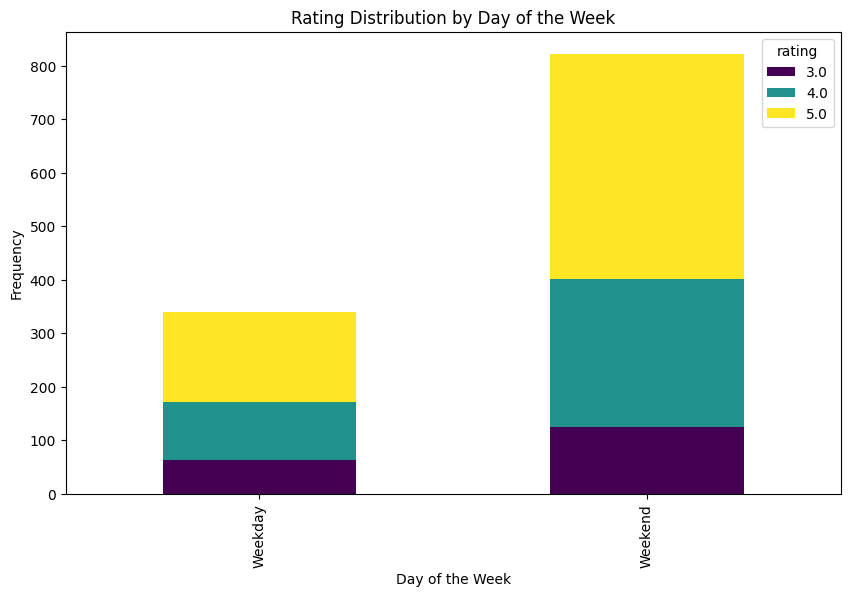

In [ ]:

# 7. Stacked Bar Chart: Rating Distribution by Day of the Week
rating_by_day = data.groupby(['day_of_the_week', 'rating']).size().unstack()
rating_by_day.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))
plt.title("Rating Distribution by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Frequency")
plt.show()

#### Observations:

- Weekends see significantly higher total orders, with a strong dominance of 5-star ratings.
- Weekdays show fewer ratings overall, and the distribution of 3.0, 4.0, and 5.0 ratings is more balanced.
- Higher ratings on weekends could indicate better service quality or happier customers due to relaxed weekend schedules.

**Conclusion**: The weekend is the key driver of customer satisfaction and revenue. Businesses should capitalize on this by ensuring top-notch service and efficient operations during weekends. Weekday performance could be improved through promotions or loyalty programs to boost orders and ratings.


#### **Multivariate Analysis Recommendations**:
1. **Weekend Focus**: Use the higher order frequency on weekends to generate more revenue by upselling premium items, introducing combos, or offering targeted promotions.
2. **Operational Consistency**: Maintain the current food preparation efficiency but explore methods to reduce preparation times further without sacrificing quality, especially during peak hours.
3. **Boost Weekday Sales**: Introduce weekday-specific offers such as lunch specials or family deals to attract more customers.
1. **Strengthen Weekend Operations**: Weekends are critical for both ratings and order volumes. Focus on ensuring timely deliveries and maintaining high service standards during peak times.
2. **Diversify Pricing Strategy**: Cater to diverse audiences by emphasizing affordability for cost-sensitive cuisines (Mexican, Fast Food) and luxury dining experiences for premium cuisines (French, Japanese).
3. **Focus on Service Quality**: Since ratings are largely independent of cost_of_the_order and delivery_time, prioritize customer experience to sustain high ratings.
4. **Optimize Logistics**: Reduce weekend delivery variability through better resource allocation and demand forecasting.
5. **Promote Weekday Offers**: Use discounts or loyalty rewards to boost weekday sales and engagement.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Convert 'rating' to numeric using .loc to avoid the warning
data.loc[:, 'rating'] = pd.to_numeric(data['rating'], errors='coerce')

# Group data by restaurant name
restaurant_ratings = data.groupby('restaurant_name')['rating']

# Calculate the rating count and average rating for each restaurant
restaurant_stats = restaurant_ratings.agg(['count', 'mean'])

# Filter restaurants based on the criteria
promotional_restaurants = restaurant_stats[
    (restaurant_stats['count'] > 50) & (restaurant_stats['mean'] > 4)
]

# Display the restaurants that meet the criteria
print("Restaurants eligible for the promotional offer:")
print(promotional_restaurants)



Restaurants eligible for the promotional offer:
                           count      mean
restaurant_name                           
Blue Ribbon Fried Chicken     64  4.328125
Blue Ribbon Sushi             73  4.219178
Shake Shack                  133  4.278195
The Meatball Shop             84  4.511905


#### Observations:


The following restaurants meet the criteria for the promotional offer, with more than 50 ratings and an average rating greater than 4:
1.   **Blue Ribbon Fried Chicken:** 64 ratings, average rating 4.33
2.   **Blue Ribbon Sushi:** 73 ratings, average rating 4.22
1.   **Shake Shack:** 133 ratings, average rating 4.28
2.   **The Meatball Shop:** 84 ratings, average rating 4.51





These restaurants have demonstrated consistent customer satisfaction and engagement, making them eligible for the promotional offer.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Filter orders that cost more than 20 dollars
order_above_20 = data[data['cost_of_the_order'] > 20]['cost_of_the_order']

# Filter orders that cost more than 5 dollars but less than or equal to 20 dollars
order_5_to_20 = data[(data['cost_of_the_order'] > 5) & (data['cost_of_the_order'] <= 20)]['cost_of_the_order']

# Calculate the revenue generated from orders costing more than 20 dollars (25% charge)
company_order_20 = order_above_20.sum() * 0.25

# Calculate the revenue generated from orders costing more than 5 dollars but less than or equal to 20 dollars (15% charge)
company_order_5_to_20 = order_5_to_20.sum() * 0.15

# Calculate the total net revenue
net_revenue = company_order_20 + company_order_5_to_20

# Print the net revenue
print("The net revenue generated by the company across all orders is:", net_revenue, "dollars")

The net revenue generated by the company across all orders is: 3865.572 dollars


#### Observations:


The net revenue generated by the company across all orders amounts to 3865.572  dollars. This revenue is derived from the service charge percentages applied to orders based on their cost, reflecting the company's earnings from facilitating food delivery services.


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Temporary DataFrame to avoid modifying the original data
temp_data = data.copy()

# 'total_time' column to the temporary DataFrame
temp_data['total_time'] = temp_data['food_preparation_time'] + temp_data['delivery_time']

# Extract order_id and total_time for analysis
total_time = temp_data[['order_id', 'total_time']]

# Filter rows where total_time exceeds 60 minutes
total_time_above_60 = total_time[total_time['total_time'] > 60]

# Count the number of orders with total_time > 60 minutes
total_above_60 = total_time_above_60.shape[0]

# Get the total number of orders in the original dataset
total_orders = data.shape[0]

# Calculate the percentage of orders with total_time > 60 minutes
percentage_orders_above_60 = (total_above_60 / total_orders) * 100

# Print the result
print(f"The percentage of orders that take more than 60 minutes to get delivered is {percentage_orders_above_60:.2f}%")




The percentage of orders that take more than 60 minutes to get delivered is 10.24%


#### Observations:


Approximately 10.24% of orders take more than 60 minutes to be delivered, including both food preparation and delivery time, indicating room for improvement in efficiency to reduce delays and enhance customer satisfaction.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Filter the data for rows where 'day_of_the_week' is 'Weekend'
data_day_weekend = data[data['day_of_the_week'] == 'Weekend']

# Filter the data for rows where 'day_of_the_week' is 'Weekday'
data_day_weekday = data[data['day_of_the_week'] == 'Weekday']

# Calculate the average delivery time for the weekend
delivery_weekend = data_day_weekend['delivery_time'].mean()

# Calculate the average delivery time for weekdays
delivery_weekday = data_day_weekday['delivery_time'].mean()

# Create a dictionary to store the average delivery times for each day type
delivery_time = {'Weekend': delivery_weekend, 'Weekday': delivery_weekday}

# Display the dictionary containing the average delivery times
delivery_time


{'Weekend': 22.436739659367397, 'Weekday': 28.305882352941175}

#### Observations:


The analysis of delivery times reveals a noticeable difference between weekdays and weekends:  

- **Weekend mean delivery time:** 22.44 minutes  
- **Weekday mean delivery time:** 28.30 minutes  

This indicates that orders are delivered faster on weekends compared to weekdays. This could be due to lighter traffic or a lower volume of orders during weekends, allowing for quicker deliveries.

### Conclusion and Recommendations

## **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:

1. **Customer Behavior and Order Patterns**:
   - Most customers (87.6%) place only 1-2 orders, indicating low customer retention or infrequent usage of the platform.
   - Orders are heavily skewed toward weekends (70.74%), reflecting peak activity during leisure periods.

2. **Cuisine Preferences**:
   - American and Japanese cuisines dominate the platform, contributing the highest number of orders. Conversely, some cuisines like vietnamese, Spanish have minimal demand.
   - Premium cuisines such as French and Mediterranean have higher order costs, indicating an opportunity to cater to high-spending customers.

3. **Customer Satisfaction**:
   - Ratings are overwhelmingly positive, with a median of 5 and an average of 4.34, reflecting general satisfaction. However, ratings below 4 (16%) highlight occasional service or quality concerns, particularly during weekends.

4. **Operational Efficiency**:
   - Food preparation and delivery times are consistent and align with customer expectations (20–35 minutes and 15–33 minutes, respectively). However, slight delays during weekends and a few outliers suggest areas for optimization.

5. **Restaurant Performance**:
   - A small number of restaurants account for a large proportion of orders, while many restaurants have low order volumes. This highlights the dominance of a few high-performing restaurants and the underperformance of others.

### Recommendations:

1. **Enhance Customer Retention**:
   - **Loyalty Programs**: Introduce rewards for repeat customers, such as discounts or points for each order, to increase order frequency.
   - **Personalized Promotions**: Use data-driven insights to offer targeted promotions for customers based on their ordering history.

2. **Leverage Cuisine Preferences**:
   - **Popular Cuisines**: Expand offerings for American and Japanese cuisines to meet demand.
   - **Underperforming Cuisines**: Promote less popular cuisines like Vietnamese, Spanish through discounts or curated meal deals to encourage trials.
   - **Premium Experiences**: Upsell high-cost cuisines (e.g., French and Mediterranean) with premium packaging and exclusive offers to target high-value customers.

3. **Improve Weekend Operations**:
   - **Staffing and Resources**: Increase kitchen and delivery staff on weekends to handle higher order volumes efficiently.
   - **Weekend Promotions**: Introduce special weekend-only offers, such as combo meals or free delivery, to maximize revenue.

4. **Address Negative Feedback**:
   - Focus on identifying and resolving issues that lead to low ratings (e.g., slow delivery or food quality). Actively engage with dissatisfied customers to recover their trust.

5. **Boost Weekday Sales**:
   - Introduce weekday-specific promotions, such as lunch specials, loyalty points, or "happy hour" discounts, to attract customers during off-peak periods.

6. **Optimize Preparation and Delivery**:
   - **Reduce Outliers**: Work with restaurants to ensure consistent preparation times and avoid delays during peak hours.
   - **Delivery Optimization**: Use predictive analytics to better allocate resources, reduce delivery times, and improve customer satisfaction.

7. **Support Underperforming Restaurants**:
   - **Visibility**: Feature low-performing restaurants in promotional banners or highlight them in search results.
   - **Partnerships**: Provide training or insights to restaurants on improving menu offerings and service quality.

8. **Incentivize High-Performing Restaurants**:
   - Encourage top-performing restaurants to expand their menus or add branches to increase order volumes.

---

**Summary**

The analysis reveals key opportunities to improve customer retention, optimize operations, and leverage cuisine preferences for growth. Most customers order infrequently, highlighting the need for loyalty programs and personalized promotions to encourage repeat purchases. American and Japanese cuisines dominate, while less popular options like Vietnamese and Spanish can benefit from targeted marketing. Weekends see the highest order volumes, requiring better resource allocation and enhanced service quality to manage demand effectively. Ratings are largely positive, but addressing occasional low feedback and ensuring consistent preparation and delivery times will further improve satisfaction. Boosting weekday sales through promotions and supporting underperforming restaurants with visibility and training are critical. By focusing on these areas, the business can enhance customer experience, grow revenue, and strengthen its market presence